In [1]:
import pandas as pd

In [2]:
interactions_df = pd.read_csv('../data/users_interactions.csv')
interactions_df.shape

(72312, 8)

In [3]:
interactions_df.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


In [4]:
interactions_df['datetime'] = pd.to_datetime(interactions_df['timestamp'], unit='s')
interactions_df['datetime'].describe()

count                   72312
unique                  68772
top       2016-05-27 02:23:43
freq                        7
first     2016-03-14 13:54:36
last      2017-02-28 19:21:51
Name: datetime, dtype: object

In [5]:
interactions_df['year'] = interactions_df['datetime'].dt.year
interactions_df['quarter'] = interactions_df['datetime'].dt.to_period("Q")
interactions_df['month'] = interactions_df['datetime'].dt.to_period("M")

In [6]:
interactions_df['year'].value_counts()

2016    66508
2017     5804
Name: year, dtype: int64

In [7]:
interactions_df['quarter'].value_counts().sort_index()

2016Q1      858
2016Q2    32435
2016Q3    23047
2016Q4    10168
2017Q1     5804
Freq: Q-DEC, Name: quarter, dtype: int64

In [8]:
interactions_df['month'].value_counts().sort_index()

2016-03      858
2016-04     7048
2016-05     9072
2016-06    16315
2016-07     8097
2016-08     7945
2016-09     7005
2016-10     5085
2016-11     2629
2016-12     2454
2017-01     2895
2017-02     2909
Freq: M, Name: month, dtype: int64

In [9]:
interactions_df.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry,datetime,year,quarter,month
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN,2016-06-08 19:10:32,2016,2016Q2,2016-06
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US,2016-06-08 19:02:40,2016,2016Q2,2016-06
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN,2016-06-08 20:03:10,2016,2016Q2,2016-06
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN,2016-06-08 19:24:55,2016,2016Q2,2016-06
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN,2016-06-08 18:58:10,2016,2016Q2,2016-06


In [10]:
interactions_df['eventType'].value_counts()

VIEW               61086
LIKE                5745
BOOKMARK            2463
COMMENT CREATED     1611
FOLLOW              1407
Name: eventType, dtype: int64

In [11]:
interactions_df['eventType'].value_counts()/ len(interactions_df) * 100

VIEW               84.475606
LIKE                7.944739
BOOKMARK            3.406074
COMMENT CREATED     2.227846
FOLLOW              1.945735
Name: eventType, dtype: float64

In [12]:
#No of Items
len(interactions_df['contentId'].unique())

2987

In [13]:
#No of Users
len(interactions_df['personId'].unique())

1895

In [14]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

def analyse_trend(of_cols, period_col):
    periods = interactions_df[period_col].value_counts().sort_index().index

    for period in periods:        
        count = len(interactions_df[interactions_df[period_col] == period])
        print("No of interactions in {} : {}".format(period, count))        
    print()
            
    for i, period in enumerate(periods):
        elapsed_periods = list(periods[:i])
        elapsed_periods.append(period)
        
        print(elapsed_periods)
        interactions_during_elapsed_periods_df = interactions_df[interactions_df[period_col].isin(elapsed_periods)]
        print("\t no of interactions     : ", len(interactions_during_elapsed_periods_df))
        for of_col in of_cols:
            count = len(interactions_during_elapsed_periods_df[of_col].unique())
            print("\t no of unique {}  : {}".format(of_col, count))        
        print()
        
        no_of_elapsed_periods = len(elapsed_periods)
        if no_of_elapsed_periods > 1:
            train_periods = elapsed_periods[:no_of_elapsed_periods-1] #except last period
            test_period = elapsed_periods[-1] #last period
            
            print("\t train {} : {}".format(period_col, train_periods))
            interactions_during_train_periods_df = interactions_df[interactions_df[period_col].isin(train_periods)]
            print("\t\t no of interactions     : ", len(interactions_during_train_periods_df))
            for of_col in of_cols:
                count = len(interactions_during_train_periods_df[of_col].unique())
                print("\t\t no of unique {}  : {}".format(of_col, count))
            print()
            
            print("\t test  {} : {}".format(period_col, test_period))
            interactions_during_test_periods_df = interactions_df[interactions_df[period_col].isin([test_period])]
            print("\t\t no of interactions     : ", len(interactions_during_test_periods_df))
            for of_col in of_cols:
                count = len(interactions_during_test_periods_df[of_col].unique())
                print("\t\t no of unique {}  : {}".format(of_col, count))
            print()
            
            print("\t train and test {}".format(period_col))
            for of_col in of_cols:
                train_set = set(interactions_during_train_periods_df[of_col].unique())
                test_set = set(interactions_during_test_periods_df[of_col].unique())
                
                common = train_set.intersection(test_set)
                print("\t\t common        {} : {}".format(of_col, len(common)))
                
                only_in_train = train_set - test_set
                print("\t\t only_in_train {} : {}".format(of_col, len(only_in_train)))
                
                only_in_test = test_set - train_set
                print("\t\t only_in_test  {} : {}".format(of_col, len(only_in_test)))
                
                print()
                
                venn2(subsets = (len(only_in_train), len(only_in_test), len(common)), 
                      set_labels = ('Train_' + of_col, 'Test_' + of_col))
                plt.show()                                           
        print('*'*30)
    

In [15]:
def analyse_trend_user_item(period_col, user_col, item_col):
    periods = interactions_df[period_col].value_counts().sort_index().index

    for period in periods:        
        count = len(interactions_df[interactions_df[period_col] == period])
        print("interactions_count in {} : {}".format(period, count))        
    print()
            
    for i, period in enumerate(periods):
        elapsed_periods = list(periods[:i])
        elapsed_periods.append(period)
        
        # print(elapsed_periods)
        print("elapsed_" + period_col + "s   : ", [str(period) for period in elapsed_periods])
        interactions_during_elapsed_periods_df = interactions_df[interactions_df[period_col].isin(elapsed_periods)]
        print("interactions_count : ", len(interactions_during_elapsed_periods_df))
        
        users_count = len(interactions_during_elapsed_periods_df[user_col].unique())
        items_count = len(interactions_during_elapsed_periods_df[item_col].unique())
        print("users_count        :  {}\nitems_count        :  {}".format(users_count, items_count))        
        print()
        
        no_of_elapsed_periods = len(elapsed_periods)
        if no_of_elapsed_periods > 1:
            train_periods = elapsed_periods[:no_of_elapsed_periods-1] #except last period
            test_period = elapsed_periods[-1] #last period
            
            # print("Train {} : {}".format(period_col, train_periods))
            print("Train {} : {}".format(period_col, [str(period) for period in train_periods]))
            interactions_during_train_periods_df = interactions_df[interactions_df[period_col].isin(train_periods)]
            print("\t interactions_count : ", len(interactions_during_train_periods_df))
            users_count = len(interactions_during_train_periods_df[user_col].unique())
            items_count = len(interactions_during_train_periods_df[item_col].unique())
            print("\t users_count        :  {}\n\t items_count        :  {}".format(users_count, items_count))
                   
            print("Test  {} : {}".format(period_col, test_period))
            interactions_during_test_periods_df = interactions_df[interactions_df[period_col].isin([test_period])]
            print("\t interactions_count : ", len(interactions_during_test_periods_df))
            users_count = len(interactions_during_test_periods_df[user_col].unique())
            items_count = len(interactions_during_test_periods_df[item_col].unique())
            print("\t users_count        :  {}\n\t items_count        :  {}".format(users_count, items_count))
            
            print("Train and test {}".format(period_col))
            train_users_set = set(interactions_during_train_periods_df[user_col].unique())
            test_users_set = set(interactions_during_test_periods_df[user_col].unique())
            common_users_set = train_users_set.intersection(test_users_set)
            only_in_train_users_set = train_users_set - test_users_set
            only_in_test_users_set = test_users_set - train_users_set
                
            train_items_set = set(interactions_during_train_periods_df[item_col].unique())
            test_items_set = set(interactions_during_test_periods_df[item_col].unique())
            common_items_set = train_items_set.intersection(test_items_set)
            only_in_train_items_set = train_items_set - test_items_set
            only_in_test_items_set = test_items_set - train_items_set

            print("\t Common")
            print("\t\t users_count        :  {}\n\t\t items_count        :  {}".format(len(common_users_set), 
                                                                          len(common_items_set)))
            print("\t Only_in_train")
            print("\t\t users_count        :  {}\n\t\t items_count        :  {}".format(len(only_in_train_users_set), 
                                                                          len(only_in_train_items_set)))
            print("\t Only_in_test")
            print("\t\t users_count        :  {}\n\t\t items_count        :  {}".format(len(only_in_test_users_set), 
                                                                          len(only_in_test_items_set)))   
                       
            
            fig, (ax1, ax2) = plt.subplots(1, 2)
            ax1.set_title('Users')
            venn2(subsets = (len(only_in_train_users_set), len(only_in_test_users_set), len(common_users_set)), 
                  set_labels = ('Train', 'Test'), ax=ax1)
            
            ax2.set_title('Items')
            venn2(subsets = (len(only_in_train_items_set), len(only_in_test_items_set), len(common_items_set)), 
                  set_labels = ('Train', 'Test'), ax=ax2)
            plt.show()                        
            
            print("Recommender Setup : {}".format(period_col))
                         
            items_ununsed_set = train_items_set - test_items_set
            items_added_set = test_items_set - train_items_set

            existing_users_in_test_set = common_users_set
            existing_users_in_test_items_used_set = set(interactions_during_test_periods_df[\
                interactions_during_test_periods_df[user_col].isin(existing_users_in_test_set)][item_col].unique())                                                                

            existing_items_in_test_set = common_items_set
            existing_items_used_set = existing_users_in_test_items_used_set.intersection(existing_items_in_test_set)
            existing_items_unused_set = existing_items_in_test_set - existing_items_used_set
            new_items_used_set = existing_users_in_test_items_used_set.intersection(items_added_set)
                        
            print("\t No of train_users in test   : ", len(existing_users_in_test_set))
            print("\t No of items_used            : ", len(existing_users_in_test_items_used_set))
            print("\t No of existing_items_used   : ", len(existing_items_used_set))
            print("\t No of existing_items_unused : ", len(existing_items_unused_set))
            print("\t No of new_items_used        : ", len(new_items_used_set))
            is_valid = True if (existing_users_in_test_items_used_set == existing_items_used_set.union(new_items_used_set)) else False            
            if not is_valid:
                print("\t Items Add Up ? : ", is_valid)
                input()                                      
            print()
            
            
#             new_users_in_test_set = only_in_test_users_set
#             new_items_in_test_set = only_in_test_items_set
#             new_users_used_items_set = set(interactions_during_test_periods_df[\
#                 interactions_during_test_periods_df[user_col].isin(new_users_in_test_set)][item_col].unique())
#             new_users_used_existing_items_set = new_users_used_items_set.intersection(existing_items_used_set)
#             new_users_used_new_items_set = new_users_used_items_set.intersection(new_items_in_test_set)
#             print("\t No of new users in test   : ", len(new_users_in_test_set))
#             print("\t No of items_used          : ", len(new_users_used_items_set))
#             print("\t No of existing_items_used : ", len(new_users_used_existing_items_set))
#             print("\t No of new_items_used      : ", len(new_users_used_new_items_set))
        print('*'*80)

interactions_count in 2016 : 66508
interactions_count in 2017 : 5804

elapsed_years   :  ['2016']
interactions_count :  66508
users_count        :  1823
items_count        :  2787

********************************************************************************
elapsed_years   :  ['2016', '2017']
interactions_count :  72312
users_count        :  1895
items_count        :  2987

Train year : ['2016']
	 interactions_count :  66508
	 users_count        :  1823
	 items_count        :  2787
Test  year : 2017
	 interactions_count :  5804
	 users_count        :  965
	 items_count        :  502
Train and test year
	 Common
		 users_count        :  893
		 items_count        :  302
	 Only_in_train
		 users_count        :  930
		 items_count        :  2485
	 Only_in_test
		 users_count        :  72
		 items_count        :  200


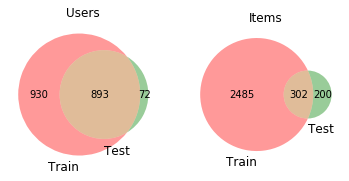

Recommender Setup : year
	 No of train_users in test   :  893
	 No of items_used            :  488
	 No of existing_items_used   :  289
	 No of existing_items_unused :  13
	 No of new_items_used        :  199

********************************************************************************


In [16]:
# analyse_trend(of_cols=['personId', 'contentId'], period_col='year')
analyse_trend_user_item(period_col='year', user_col='personId', item_col='contentId')

interactions_count in 2016Q1 : 858
interactions_count in 2016Q2 : 32435
interactions_count in 2016Q3 : 23047
interactions_count in 2016Q4 : 10168
interactions_count in 2017Q1 : 5804

elapsed_quarters   :  ['2016Q1']
interactions_count :  858
users_count        :  209
items_count        :  114

********************************************************************************
elapsed_quarters   :  ['2016Q1', '2016Q2']
interactions_count :  33293
users_count        :  1374
items_count        :  1498

Train quarter : ['2016Q1']
	 interactions_count :  858
	 users_count        :  209
	 items_count        :  114
Test  quarter : 2016Q2
	 interactions_count :  32435
	 users_count        :  1362
	 items_count        :  1461
Train and test quarter
	 Common
		 users_count        :  197
		 items_count        :  77
	 Only_in_train
		 users_count        :  12
		 items_count        :  37
	 Only_in_test
		 users_count        :  1165
		 items_count        :  1384


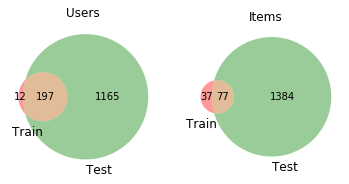

Recommender Setup : quarter
	 No of train_users in test   :  197
	 No of items_used            :  1374
	 No of existing_items_used   :  68
	 No of existing_items_unused :  9
	 No of new_items_used        :  1306

********************************************************************************
elapsed_quarters   :  ['2016Q1', '2016Q2', '2016Q3']
interactions_count :  56340
users_count        :  1712
items_count        :  2364

Train quarter : ['2016Q1', '2016Q2']
	 interactions_count :  33293
	 users_count        :  1374
	 items_count        :  1498
Test  quarter : 2016Q3
	 interactions_count :  23047
	 users_count        :  1427
	 items_count        :  1328
Train and test quarter
	 Common
		 users_count        :  1089
		 items_count        :  462
	 Only_in_train
		 users_count        :  285
		 items_count        :  1036
	 Only_in_test
		 users_count        :  338
		 items_count        :  866


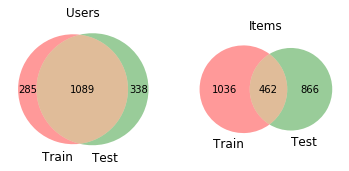

Recommender Setup : quarter
	 No of train_users in test   :  1089
	 No of items_used            :  1289
	 No of existing_items_used   :  425
	 No of existing_items_unused :  37
	 No of new_items_used        :  864

********************************************************************************
elapsed_quarters   :  ['2016Q1', '2016Q2', '2016Q3', '2016Q4']
interactions_count :  66508
users_count        :  1823
items_count        :  2787

Train quarter : ['2016Q1', '2016Q2', '2016Q3']
	 interactions_count :  56340
	 users_count        :  1712
	 items_count        :  2364
Test  quarter : 2016Q4
	 interactions_count :  10168
	 users_count        :  1060
	 items_count        :  943
Train and test quarter
	 Common
		 users_count        :  949
		 items_count        :  520
	 Only_in_train
		 users_count        :  763
		 items_count        :  1844
	 Only_in_test
		 users_count        :  111
		 items_count        :  423


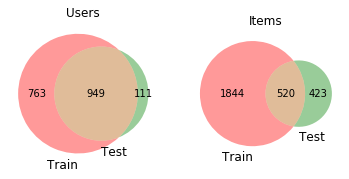

Recommender Setup : quarter
	 No of train_users in test   :  949
	 No of items_used            :  911
	 No of existing_items_used   :  490
	 No of existing_items_unused :  30
	 No of new_items_used        :  421

********************************************************************************
elapsed_quarters   :  ['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1']
interactions_count :  72312
users_count        :  1895
items_count        :  2987

Train quarter : ['2016Q1', '2016Q2', '2016Q3', '2016Q4']
	 interactions_count :  66508
	 users_count        :  1823
	 items_count        :  2787
Test  quarter : 2017Q1
	 interactions_count :  5804
	 users_count        :  965
	 items_count        :  502
Train and test quarter
	 Common
		 users_count        :  893
		 items_count        :  302
	 Only_in_train
		 users_count        :  930
		 items_count        :  2485
	 Only_in_test
		 users_count        :  72
		 items_count        :  200


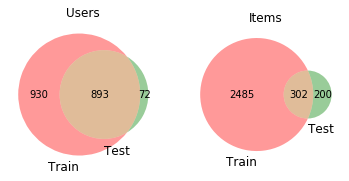

Recommender Setup : quarter
	 No of train_users in test   :  893
	 No of items_used            :  488
	 No of existing_items_used   :  289
	 No of existing_items_unused :  13
	 No of new_items_used        :  199

********************************************************************************


In [17]:
# analyse_trend(of_cols=['personId', 'contentId'], period_col='quarter')
analyse_trend_user_item(period_col='quarter', user_col='personId', item_col='contentId')

interactions_count in 2016-03 : 858
interactions_count in 2016-04 : 7048
interactions_count in 2016-05 : 9072
interactions_count in 2016-06 : 16315
interactions_count in 2016-07 : 8097
interactions_count in 2016-08 : 7945
interactions_count in 2016-09 : 7005
interactions_count in 2016-10 : 5085
interactions_count in 2016-11 : 2629
interactions_count in 2016-12 : 2454
interactions_count in 2017-01 : 2895
interactions_count in 2017-02 : 2909

elapsed_months   :  ['2016-03']
interactions_count :  858
users_count        :  209
items_count        :  114

********************************************************************************
elapsed_months   :  ['2016-03', '2016-04']
interactions_count :  7906
users_count        :  868
items_count        :  638

Train month : ['2016-03']
	 interactions_count :  858
	 users_count        :  209
	 items_count        :  114
Test  month : 2016-04
	 interactions_count :  7048
	 users_count        :  835
	 items_count        :  593
Train and test month
	 

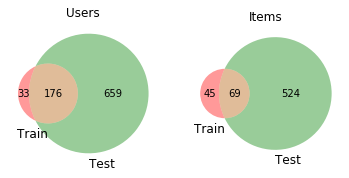

Recommender Setup : month
	 No of train_users in test   :  176
	 No of items_used            :  552
	 No of existing_items_used   :  60
	 No of existing_items_unused :  9
	 No of new_items_used        :  492

********************************************************************************
elapsed_months   :  ['2016-03', '2016-04', '2016-05']
interactions_count :  16978
users_count        :  1144
items_count        :  1070

Train month : ['2016-03', '2016-04']
	 interactions_count :  7906
	 users_count        :  868
	 items_count        :  638
Test  month : 2016-05
	 interactions_count :  9072
	 users_count        :  886
	 items_count        :  635
Train and test month
	 Common
		 users_count        :  610
		 items_count        :  203
	 Only_in_train
		 users_count        :  258
		 items_count        :  435
	 Only_in_test
		 users_count        :  276
		 items_count        :  432


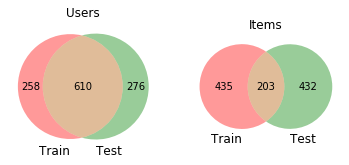

Recommender Setup : month
	 No of train_users in test   :  610
	 No of items_used            :  614
	 No of existing_items_used   :  186
	 No of existing_items_unused :  17
	 No of new_items_used        :  428

********************************************************************************
elapsed_months   :  ['2016-03', '2016-04', '2016-05', '2016-06']
interactions_count :  33293
users_count        :  1374
items_count        :  1498

Train month : ['2016-03', '2016-04', '2016-05']
	 interactions_count :  16978
	 users_count        :  1144
	 items_count        :  1070
Test  month : 2016-06
	 interactions_count :  16315
	 users_count        :  992
	 items_count        :  712
Train and test month
	 Common
		 users_count        :  762
		 items_count        :  284
	 Only_in_train
		 users_count        :  382
		 items_count        :  786
	 Only_in_test
		 users_count        :  230
		 items_count        :  428


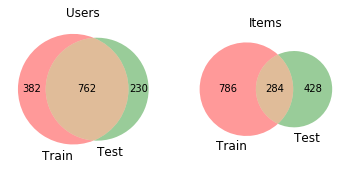

Recommender Setup : month
	 No of train_users in test   :  762
	 No of items_used            :  693
	 No of existing_items_used   :  266
	 No of existing_items_unused :  18
	 No of new_items_used        :  427

********************************************************************************
elapsed_months   :  ['2016-03', '2016-04', '2016-05', '2016-06', '2016-07']
interactions_count :  41390
users_count        :  1547
items_count        :  1825

Train month : ['2016-03', '2016-04', '2016-05', '2016-06']
	 interactions_count :  33293
	 users_count        :  1374
	 items_count        :  1498
Test  month : 2016-07
	 interactions_count :  8097
	 users_count        :  1070
	 items_count        :  619
Train and test month
	 Common
		 users_count        :  897
		 items_count        :  292
	 Only_in_train
		 users_count        :  477
		 items_count        :  1206
	 Only_in_test
		 users_count        :  173
		 items_count        :  327


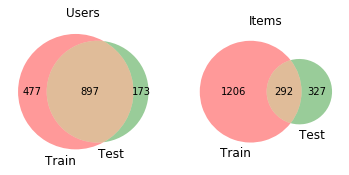

Recommender Setup : month
	 No of train_users in test   :  897
	 No of items_used            :  594
	 No of existing_items_used   :  269
	 No of existing_items_unused :  23
	 No of new_items_used        :  325

********************************************************************************
elapsed_months   :  ['2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08']
interactions_count :  49335
users_count        :  1628
items_count        :  2119

Train month : ['2016-03', '2016-04', '2016-05', '2016-06', '2016-07']
	 interactions_count :  41390
	 users_count        :  1547
	 items_count        :  1825
Test  month : 2016-08
	 interactions_count :  7945
	 users_count        :  930
	 items_count        :  631
Train and test month
	 Common
		 users_count        :  849
		 items_count        :  337
	 Only_in_train
		 users_count        :  698
		 items_count        :  1488
	 Only_in_test
		 users_count        :  81
		 items_count        :  294


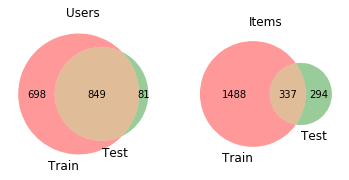

Recommender Setup : month
	 No of train_users in test   :  849
	 No of items_used            :  610
	 No of existing_items_used   :  316
	 No of existing_items_unused :  21
	 No of new_items_used        :  294

********************************************************************************
elapsed_months   :  ['2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09']
interactions_count :  56340
users_count        :  1712
items_count        :  2364

Train month : ['2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08']
	 interactions_count :  49335
	 users_count        :  1628
	 items_count        :  2119
Test  month : 2016-09
	 interactions_count :  7005
	 users_count        :  869
	 items_count        :  595
Train and test month
	 Common
		 users_count        :  785
		 items_count        :  350
	 Only_in_train
		 users_count        :  843
		 items_count        :  1769
	 Only_in_test
		 users_count        :  84
		 items_count        :  245


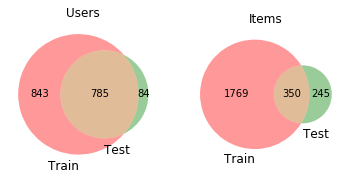

Recommender Setup : month
	 No of train_users in test   :  785
	 No of items_used            :  577
	 No of existing_items_used   :  333
	 No of existing_items_unused :  17
	 No of new_items_used        :  244

********************************************************************************
elapsed_months   :  ['2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10']
interactions_count :  61425
users_count        :  1761
items_count        :  2557

Train month : ['2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09']
	 interactions_count :  56340
	 users_count        :  1712
	 items_count        :  2364
Test  month : 2016-10
	 interactions_count :  5085
	 users_count        :  747
	 items_count        :  516
Train and test month
	 Common
		 users_count        :  698
		 items_count        :  323
	 Only_in_train
		 users_count        :  1014
		 items_count        :  2041
	 Only_in_test
		 users_count        :  49
		 items_count        

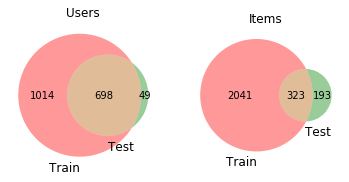

Recommender Setup : month
	 No of train_users in test   :  698
	 No of items_used            :  498
	 No of existing_items_used   :  306
	 No of existing_items_unused :  17
	 No of new_items_used        :  192

********************************************************************************
elapsed_months   :  ['2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11']
interactions_count :  64054
users_count        :  1792
items_count        :  2669

Train month : ['2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10']
	 interactions_count :  61425
	 users_count        :  1761
	 items_count        :  2557
Test  month : 2016-11
	 interactions_count :  2629
	 users_count        :  606
	 items_count        :  351
Train and test month
	 Common
		 users_count        :  575
		 items_count        :  239
	 Only_in_train
		 users_count        :  1186
		 items_count        :  2318
	 Only_in_test
		 users_count        :  31


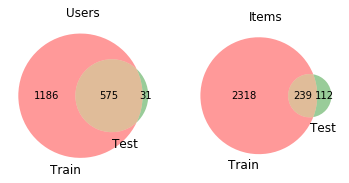

Recommender Setup : month
	 No of train_users in test   :  575
	 No of items_used            :  338
	 No of existing_items_used   :  227
	 No of existing_items_unused :  12
	 No of new_items_used        :  111

********************************************************************************
elapsed_months   :  ['2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12']
interactions_count :  66508
users_count        :  1823
items_count        :  2787

Train month : ['2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11']
	 interactions_count :  64054
	 users_count        :  1792
	 items_count        :  2669
Test  month : 2016-12
	 interactions_count :  2454
	 users_count        :  539
	 items_count        :  335
Train and test month
	 Common
		 users_count        :  508
		 items_count        :  217
	 Only_in_train
		 users_count        :  1284
		 items_count        :  2452
	 Only_in_test
		 use

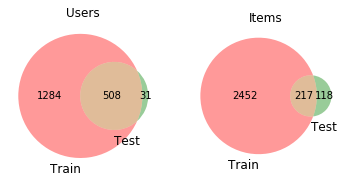

Recommender Setup : month
	 No of train_users in test   :  508
	 No of items_used            :  315
	 No of existing_items_used   :  197
	 No of existing_items_unused :  20
	 No of new_items_used        :  118

********************************************************************************
elapsed_months   :  ['2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01']
interactions_count :  69403
users_count        :  1849
items_count        :  2907

Train month : ['2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12']
	 interactions_count :  66508
	 users_count        :  1823
	 items_count        :  2787
Test  month : 2017-01
	 interactions_count :  2895
	 users_count        :  654
	 items_count        :  310
Train and test month
	 Common
		 users_count        :  628
		 items_count        :  190
	 Only_in_train
		 users_count        :  1195
		 items_count        :  2597

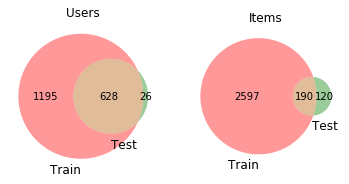

Recommender Setup : month
	 No of train_users in test   :  628
	 No of items_used            :  302
	 No of existing_items_used   :  182
	 No of existing_items_unused :  8
	 No of new_items_used        :  120

********************************************************************************
elapsed_months   :  ['2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02']
interactions_count :  72312
users_count        :  1895
items_count        :  2987

Train month : ['2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01']
	 interactions_count :  69403
	 users_count        :  1849
	 items_count        :  2907
Test  month : 2017-02
	 interactions_count :  2909
	 users_count        :  723
	 items_count        :  280
Train and test month
	 Common
		 users_count        :  677
		 items_count        :  200
	 Only_in_train
		 users_count        :  1172
		 items

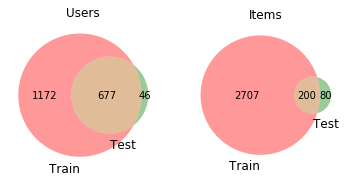

Recommender Setup : month
	 No of train_users in test   :  677
	 No of items_used            :  268
	 No of existing_items_used   :  189
	 No of existing_items_unused :  11
	 No of new_items_used        :  79

********************************************************************************


In [18]:
# analyse_trend(of_cols=['personId', 'contentId'], period_col='month')
analyse_trend_user_item(period_col='month', user_col='personId', item_col='contentId')